In [12]:
import pandas as pd

datasetRetail = pd.read_excel('Online_retail.xlsx')

# Group the dataset by CustomerID
customers_grouped = datasetRetail.groupby('CustomerID')

# Creates an empty dictionary to store the items bought by each customer
customer_items = {}

# Iterates through each customer
for customer_id, group_data in customers_grouped:

    # Checks if customer_id is already in dictionary
    if not (customer_id in customer_items.keys()):
        customer_items[customer_id] = []

    # For each costumer_id, it adds the product to that costumer
    for i in range(len(group_data["Country"].values)):
        dataset_values = {"Country": group_data["Country"].values[i],
                          "StockCode": group_data["StockCode"].values[i],
                          "Description": group_data["Description"].values[i],
                          "Quantity": group_data["Quantity"].values[i],
                          "InvoiceDate": group_data["InvoiceDate"].values[i],
                          "UnitPrice": group_data["UnitPrice"].values[i],
                          "InvoiceNo": group_data["InvoiceNo"].values[i]}

        if(group_data["Quantity"].values[i] > 0):
            customer_items[customer_id].append(dataset_values)

In [13]:
#----------------- Distinct Product Count and CustomerID is not null -----------------#

# Filter the DataFrame where 'Quantity' is greater than 0 (531285) and CustomerID is not null
filtered_data_quantity = datasetRetail[(datasetRetail['Quantity'] > 0) & (datasetRetail['CustomerID'].isna() == False)]
#print(filtered_data_quantity) #397924

# Check if any rows satisfy the condition
if not filtered_data_quantity.empty:
    category_counts_stockcode = filtered_data_quantity['StockCode'].value_counts()
    #print(category_counts_stockcode)

In [14]:
#----------------- Distinct Client Count -----------------#

# Counts the different clients through the dataset
category_counts_customerID = datasetRetail['CustomerID'].dropna().value_counts()
#print(category_counts_customerID) #4372

In [15]:
#----------------- Distinct Purcheses Done -----------------#

category_counts_invoiceNo = filtered_data_quantity['InvoiceNo'].value_counts()
#print(category_counts_invoiceNo)
#Purchases reimbursed: 5172

array([[<Axes: xlabel='CustomerID', ylabel='CustomerID'>]], dtype=object)

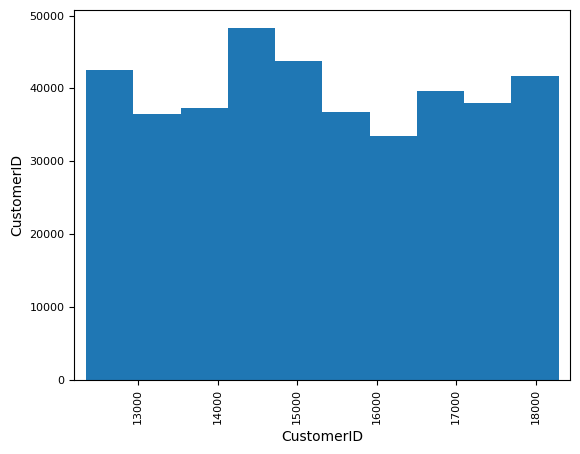

In [21]:
#---------------- Scatter Plot Purchases ----------------#

purchases_variables = filtered_data_quantity[["StockCode", "CustomerID", "InvoiceNo", "InvoiceDate"]]
pd.plotting.scatter_matrix(purchases_variables)

In [16]:
#---------------- Products reimbursed ----------------#

filtered_data_InvoiceNo = datasetRetail[(datasetRetail['Quantity'] > 0)]

products_reimbursed = len(datasetRetail['InvoiceNo']) - len(filtered_data_InvoiceNo['InvoiceNo'])
#print(products_reimbursed) #10624

In [17]:
#---------------- Purchases with no client ID ----------------#

empty_values_count = datasetRetail['CustomerID'].isna().sum()
#print(empty_values_count) #135080

In [18]:
#---------------- Rate Products reimbursed ----------------#

reimbursement_rate = (products_reimbursed / len(datasetRetail['InvoiceNo'])) * 100
#print(reimbursement_rate) #1.9604767590130447

In [19]:
#---------------- Rate Purchases with no ClientID ----------------#

noClientID_rate = (empty_values_count / len(datasetRetail['CustomerID'])) * 100
print(noClientID_rate) #24.926694334288598

24.926694334288598


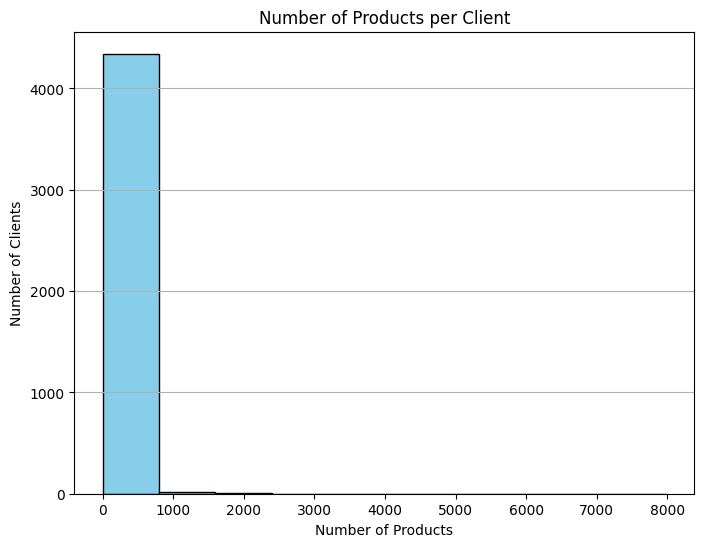

In [27]:
import matplotlib.pyplot as plt
# Group by CustomerID and count the number of products for each customer
products_per_client = datasetRetail.groupby('CustomerID')['InvoiceNo'].count()

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(products_per_client, bins=10, color='skyblue', edgecolor='black')
plt.title('Number of Products per Client')
plt.xlabel('Number of Products')
plt.ylabel('Number of Clients')
plt.grid(axis='y')
plt.show()

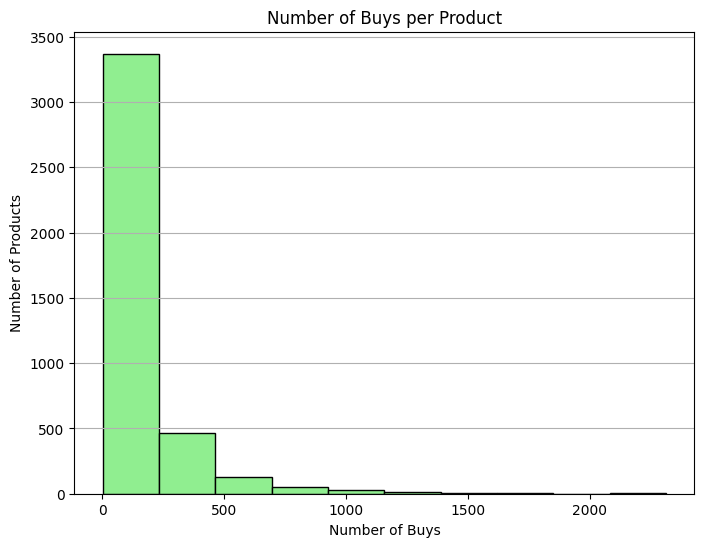

In [28]:
# Count the number of purchases for each product
buys_per_product = datasetRetail['StockCode'].value_counts()

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(buys_per_product, bins=10, color='lightgreen', edgecolor='black')
plt.title('Number of Buys per Product')
plt.xlabel('Number of Buys')
plt.ylabel('Number of Products')
plt.grid(axis='y')
plt.show()

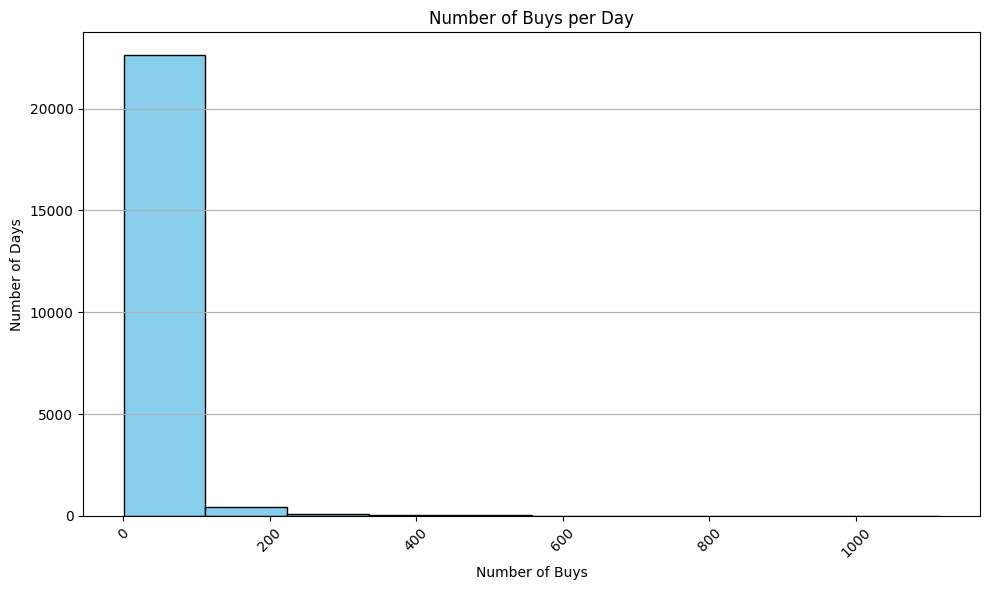

In [30]:
datasetRetail['InvoiceDate'] = pd.to_datetime(datasetRetail['InvoiceDate'])

#Group by PurchaseDate and count the number of buys for each day
buys_per_day = datasetRetail.groupby('InvoiceDate').size()

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(buys_per_day, bins=10, color='skyblue', edgecolor='black')
plt.title('Number of Buys per Day')
plt.xlabel('Number of Buys')
plt.ylabel('Number of Days')
plt.grid(axis='y')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()